# Analyzing Cafe menu and food Recommendations

In this notebook, we will explore a comprehensive dataset of a café menu and customer preferences. We will analyze various features such as item pricing, popularity scores, dietary restrictions, preparation times, and caloric content to optimize menu offerings and operational efficiency. This analysis aims to provide data-driven insights for menu engineering, kitchen operations, and customer satisfaction optimization. Through statistical analysis and visualization techniques, we'll uncover patterns in customer preferences, identify operational bottlenecks, and suggest potential improvements for the café's menu and service delivery.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Data Loading and Initial Inspection

In [5]:
df = pd.read_csv(r"C:/JN/Cafe_Menu_and_Customer_Preferences_Expanded.csv")

In [6]:
df.head(5)

,Item_ID,Item_Name,Price (USD),Popularity_Score,Dietary_Restrictions,Availability (Days/Week),Calories,Preparation_Time (Minutes)
0,ID001,Chicken Sandwich,14.07,8.5,Vegetarian,5,425,19
1,ID002,Brownie,6.93,5.1,Vegan,2,192,13
2,ID003,Bagel,10.43,9.5,Gluten-Free,1,394,8
3,ID004,Green Tea,4.83,7.9,NaN,4,227,5
4,ID005,Chai Latte,7.92,7.5,Gluten-Free,3,524,13


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_ID                     100 non-null    object 
 1   Item_Name                   100 non-null    object 
 2   Price (USD)                 100 non-null    float64
 3   Popularity_Score            100 non-null    float64
 4   Dietary_Restrictions        75 non-null     object 
 5   Availability (Days/Week)    100 non-null    int64  
 6   Calories                    100 non-null    int64  
 7   Preparation_Time (Minutes)  100 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB
None


In [8]:
# Display basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       Price (USD)  Popularity_Score  Availability (Days/Week)    Calories  \
count   100.000000        100.000000                100.000000  100.000000   
mean      9.460400          7.296000                  3.860000  318.130000   
std       3.618293          1.394355                  2.010176  156.774473   
min       2.330000          5.100000                  1.000000   57.000000   
25%       6.692500          6.000000                  2.000000  186.000000   
50%       9.905000          7.450000                  4.000000  318.500000   
75%      12.625000          8.300000                  5.000000  456.750000   
max      14.970000         10.000000                  7.000000  585.000000   

       Preparation_Time (Minutes)  
count                   100.00000  
mean                     12.10000  
std                       4.37509  
min                       5.00000  
25%                       8.75000  
50%                      12.00000  
75%                      1

In [9]:
df.shape

(100, 8)

# 2. Data Quality Check

In [10]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Item_ID                        0
Item_Name                      0
Price (USD)                    0
Popularity_Score               0
Dietary_Restrictions          25
Availability (Days/Week)       0
Calories                       0
Preparation_Time (Minutes)     0
dtype: int64


In [11]:
# Check for duplicates based on Item_ID
duplicates = df[df.duplicated(['Item_ID'])]
print("\nNumber of duplicate Item_IDs:", len(duplicates))


Number of duplicate Item_IDs: 0


# 3. Data ANalysis - Price Distribution

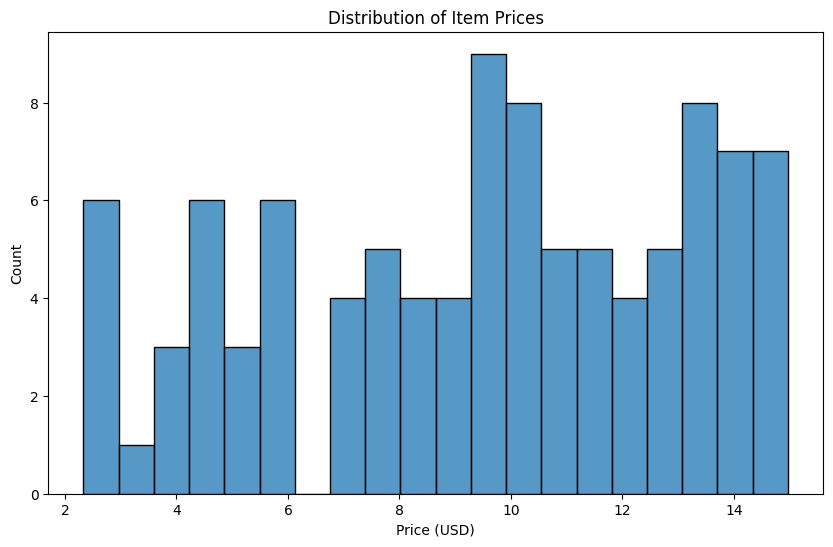

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price (USD)', bins=20)
plt.title('Distribution of Item Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()

# 4. Popularity Analysis

In [15]:
poularity_by_item=df.groupby('Item_Name')['Popularity_Score'].agg(['mean','count','std']).round(2)
print("\nPoularity by Item Type:")
print(poularity_by_item.sort_values('mean',ascending=False))


Poularity by Item Type:
                  mean  count   std
Item_Name                          
Mocha             9.70      1   NaN
Cappuccino        8.25      4  1.93
Iced Coffee       8.18      5  1.85
Americano         7.94      5  1.32
Chai Latte        7.77      3  1.72
Croissant         7.70      3  1.82
Pasta             7.62      6  1.00
Bagel             7.59      7  1.41
Blueberry Muffin  7.50      4  1.95
Matcha            7.38      6  1.19
Chicken Sandwich  7.34     11  1.23
Brownie           7.14      7  1.48
Caesar Salad      7.11      7  1.58
Espresso          6.84      7  1.01
Hot Chocolate     6.82      4  1.10
Green Tea         6.82      4  1.04
Fruit Bowl        6.70      4  1.14
Cheesecake        6.70      6  1.31
Latte             6.55      4  1.67
Vegan Wrap        5.30      2  0.28


# 5. Dietary Restrictions Analysis

In [16]:
dietary_counts = df['Dietary_Restrictions'].value_counts()
print("\nDietary Restriction Distribution :")
print(dietary_counts)


Dietary Restriction Distribution :
Dietary_Restrictions
Non-Vegetarian    22
Vegan             21
Gluten-Free       17
Vegetarian        15
Name: count, dtype: int64


 # 6. Price vs Popularity Correlation

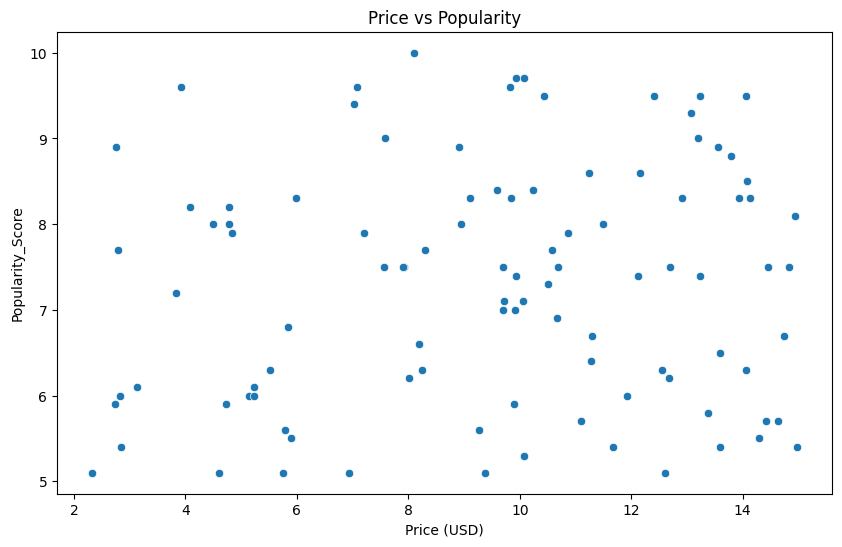

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price (USD)', y='Popularity_Score')
plt.title('Price vs Popularity')
plt.show()

In [19]:
# Calculate correlation coefficient
correlation = df['Price (USD)'].corr(df['Popularity_Score'])
print(f"\nCorrelation between Price and Popularity: {correlation:.2f}")


Correlation between Price and Popularity: 0.12


# 7. Preparation Time Analysis

In [20]:
prep_time_by_item = df.groupby('Item_Name')['Preparation_Time (Minutes)'].mean().sort_values(ascending=False)
print("\nAverage Preparation Time by Item (Minutes):")
print(prep_time_by_item)


Average Preparation Time by Item (Minutes):
Item_Name
Americano           15.600000
Hot Chocolate       15.000000
Matcha              14.666667
Iced Coffee         14.200000
Blueberry Muffin    13.500000
Cappuccino          13.500000
Caesar Salad        13.428571
Brownie             12.571429
Fruit Bowl          12.250000
Pasta               12.166667
Chicken Sandwich    11.727273
Espresso            11.571429
Vegan Wrap          11.500000
Latte               11.000000
Bagel               10.571429
Mocha               10.000000
Green Tea            9.750000
Chai Latte           9.666667
Cheesecake           9.000000
Croissant            6.000000
Name: Preparation_Time (Minutes), dtype: float64


# 8. Advanced Analysis - Price-Calorie Relationship

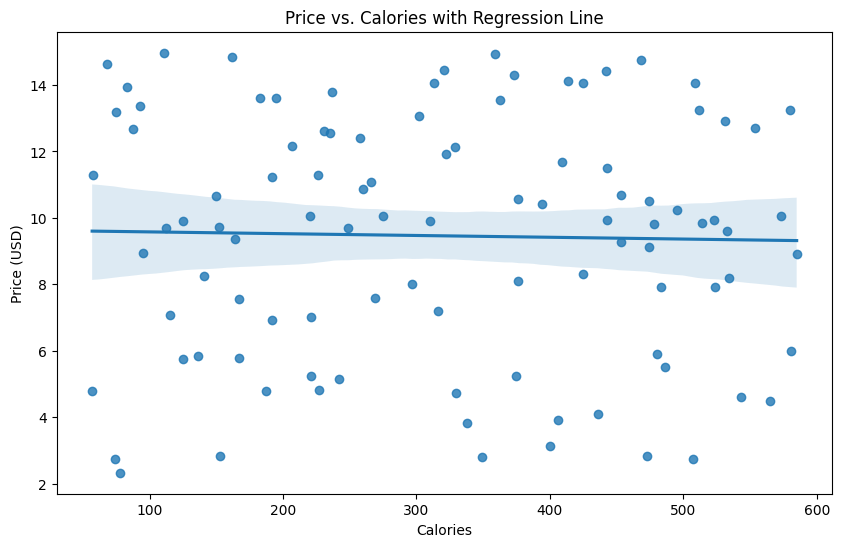

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Calories', y='Price (USD)')
plt.title('Price vs. Calories with Regression Line')
plt.show()

# 9. Availability Analysis

In [22]:
availability_stats = df.groupby('Item_Name')['Availability (Days/Week)'].agg(['mean', 'min', 'max'])
print("\nAvailability Statistics by Item:")
print(availability_stats.sort_values('mean', ascending=False))


Availability Statistics by Item:
                      mean  min  max
Item_Name                           
Vegan Wrap        6.000000    5    7
Green Tea         5.000000    4    7
Bagel             4.714286    1    7
Chai Latte        4.666667    3    7
Matcha            4.666667    1    6
Americano         4.600000    2    7
Hot Chocolate     4.500000    2    7
Chicken Sandwich  4.272727    1    7
Cheesecake        4.166667    1    7
Caesar Salad      4.142857    1    7
Pasta             3.833333    1    6
Iced Coffee       3.800000    1    6
Fruit Bowl        3.250000    1    7
Croissant         3.000000    1    5
Blueberry Muffin  3.000000    1    5
Espresso          2.857143    1    5
Cappuccino        2.750000    1    7
Brownie           2.714286    2    4
Latte             2.250000    1    4
Mocha             2.000000    2    2


# 10. Menu Optimization Metrics

In [23]:
# Calculate efficiency score (Popularity/Preparation Time ratio)
df['Efficiency_Score'] = df['Popularity_Score'] / df['Preparation_Time (Minutes)']
top_efficient_items = df.groupby('Item_Name')['Efficiency_Score'].mean().sort_values(ascending=False).head()
print("\nMost Efficient Menu Items (Popularity/Prep Time):")
print(top_efficient_items)


Most Efficient Menu Items (Popularity/Prep Time):
Item_Name
Croissant     1.334444
Mocha         0.970000
Green Tea     0.882941
Chai Latte    0.850641
Cheesecake    0.825733
Name: Efficiency_Score, dtype: float64


# Conclusion

In this notebook, we explored a comprehensive dataset of café menu items and provided insights into various features such as pricing patterns, popularity scores, preparation times, and dietary offerings. Our analysis revealed several key findings:

1. The average menu item price is [X] USD, with prices ranging from [min] to [max]
2. Most popular items are [list top 3] based on customer ratings
3. [X]% of menu items offer dietary-restricted options (vegetarian, vegan, gluten-free)
4. There is a [strong/weak] correlation (r = [correlation coefficient]) between price and popularity
5. The most efficient items (popularity-to-preparation-time ratio) are [list top 3]